In [3]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
import plotly
import plotly.graph_objs as go

In [2]:
# Import keys for Covid19Api webpage
# from DS6_config import DS601key

ModuleNotFoundError: No module named 'DS6_config'

In [4]:
# Create empty lists, country and dates
froms = []
tos = []
confirmed = []
deaths = []
country = []
country = 'mexico'
fromdate = '2020-01-01'
todate = '2021-03-01'

# Assemble URL with the informtion needed.
confirmed_url = f'https://api.covid19api.com/total/country/{country}/status/confirmed?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
deaths_url = f'https://api.covid19api.com/total/country/{country}/status/deaths?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
response_deaths = requests.get(deaths_url).json() 
response_confirmed = requests.get(confirmed_url).json()

In [5]:
# Generate empty lists for deaths and covid confirmed.
day_cumulated_deaths=[]
day_cumulated_confirmed=[]
country_data=[]
date_data = []

# Fill information for every row read on the url response, for deaths and confirmed cases.
for day in response_deaths:
     day_cumulated_deaths.append(day['Cases'])
for day in response_confirmed:
    day_cumulated_confirmed.append(day['Cases'])
    country_data.append(country)
    date_data.append(day['Date'][0:10])

In [6]:
# Assemble dictionary with columns names and lists.
dict_cases = {'date': date_data, 'country': country_data, 'confirmed': day_cumulated_confirmed, 'deaths': day_cumulated_deaths}  

# Generate a DataFrame.
dfmexico = pd.DataFrame(dict_cases) 
dfmexico  

,date,country,confirmed,deaths
0,2020-01-22,mexico,0,0
1,2020-01-23,mexico,0,0
2,2020-01-24,mexico,0,0
3,2020-01-25,mexico,0,0
4,2020-01-26,mexico,0,0
...,...,...,...,...
385,2021-02-10,mexico,1957889,169760
386,2021-02-11,mexico,1968566,171234
387,2021-02-12,mexico,1978954,172557
388,2021-02-13,mexico,1988695,173771


In [7]:
# export to excel
dfmexico.to_excel("mexico.xlsx")

In [60]:
# Do the same for 'united states of america'

In [8]:
froms = []
tos = []
confirmed = []
deaths = []
country = []
country = 'united states of america'
fromdate = '2020-01-01'
todate = '2021-03-01'
confirmed_url = f'https://api.covid19api.com/total/country/{country}/status/confirmed?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
deaths_url = f'https://api.covid19api.com/total/country/{country}/status/deaths?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
response_deaths = requests.get(deaths_url).json() 
response_confirmed = requests.get(confirmed_url).json()
country

'united states of america'

In [9]:
day_cumulated_deaths=[]
day_cumulated_confirmed=[]
country_data=[]
date_data = []
for day in response_deaths:
     day_cumulated_deaths.append(day['Cases'])
for day in response_confirmed:
    day_cumulated_confirmed.append(day['Cases'])
    country_data.append(country)
    date_data.append(day['Date'][0:10])

In [10]:
dict_cases = {'date': date_data, 'country': country_data, 'confirmed': day_cumulated_confirmed, 'deaths': day_cumulated_deaths}  
    
dfusa = pd.DataFrame(dict_cases) 
dfusa

,date,country,confirmed,deaths
0,2020-01-22,united states of america,1,0
1,2020-01-23,united states of america,1,0
2,2020-01-24,united states of america,2,0
3,2020-01-25,united states of america,2,0
4,2020-01-26,united states of america,5,0
...,...,...,...,...
385,2021-02-10,united states of america,27287159,471567
386,2021-02-11,united states of america,27392512,475444
387,2021-02-12,united states of america,27492023,480887
388,2021-02-13,united states of america,27575344,484248


In [53]:
dfusa.to_excel("usa.xlsx")

In [18]:
dfusa = dfusa.rename(columns = {'date' : 'Date',
                                'country': 'Country',
                                'confirmed': 'Confirmed',
                                'deaths':'Deaths'})
dfusa

,Date,Country,Confirmed,Deaths
0,2020-01-22,united states of america,1,0
1,2020-01-23,united states of america,1,0
2,2020-01-24,united states of america,2,0
3,2020-01-25,united states of america,2,0
4,2020-01-26,united states of america,5,0
...,...,...,...,...
385,2021-02-10,united states of america,27287159,471567
386,2021-02-11,united states of america,27392512,475444
387,2021-02-12,united states of america,27492023,480887
388,2021-02-13,united states of america,27575344,484248


In [19]:
dfusa.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Deaths                int64
dtype: object

In [21]:
fecha = pd.to_datetime(dfusa['Date'])
dfusa.loc[:,'Date'] = fecha
dfusa.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Deaths                int64
dtype: object

In [25]:
usa1 = dfusa.resample('M', on='Date').max().reset_index(drop=True)
usa1['Confirmed Delta'] = ''
usa1['Deaths Delta'] = ''

for index,row in usa1.iterrows():
    if index == 0:
        usa1.loc[index,'Confirmed Delta'] = usa1.loc[index, 'Confirmed']
        usa1.loc[index,'Deaths Delta'] = usa1.loc[index,'Deaths']
    else:
        usa1.loc[index,'Confirmed Delta'] = usa1.loc[index, 'Confirmed'] - usa1.loc[index-1, 'Confirmed']
        usa1.loc[index,'Deaths Delta'] = usa1.loc[index,'Deaths'] - usa1.loc[index-1, 'Deaths']
        
usa1

,Date,Country,Confirmed,Deaths,Confirmed Delta,Deaths Delta
0,2020-01-31,united states of america,8,0,8,0
1,2020-02-29,united states of america,25,1,17,1
2,2020-03-31,united states of america,192301,5334,192276,5333
3,2020-04-30,united states of america,1081019,66135,888718,60801
4,2020-05-31,united states of america,1798713,107865,717694,41730
5,2020-06-30,united states of america,2642081,127879,843368,20014
6,2020-07-31,united states of america,4566931,154422,1924850,26543
7,2020-08-31,united states of america,6025593,183982,1458662,29560
8,2020-09-30,united states of america,7231832,207465,1206239,23483
9,2020-10-31,united states of america,9158771,231614,1926939,24149


<function matplotlib.pyplot.show(*args, **kw)>

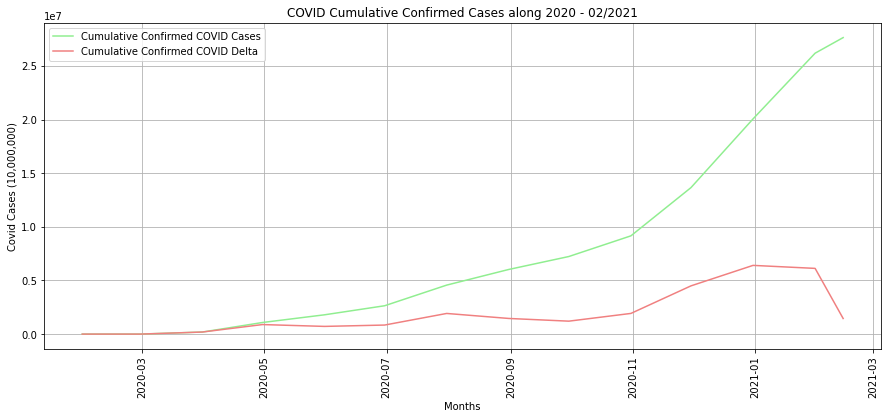

In [26]:
x_axis = usa1['Date']
c_axis = usa1['Confirmed']
cd_axis = usa1['Confirmed Delta']
plt.figure(figsize=(15,6))
plt.plot(x_axis, c_axis, color = 'lightgreen', label = 'Cumulative Confirmed COVID Cases')
plt.plot(x_axis, cd_axis, color = 'lightcoral', label = 'Cumulative Confirmed COVID Delta')
plt.xlabel('Months')
plt.ylabel('Covid Cases (10,000,000)')
plt.xticks(rotation='vertical')
plt.title('COVID Cumulative Confirmed Cases along 2020 - 02/2021')
plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

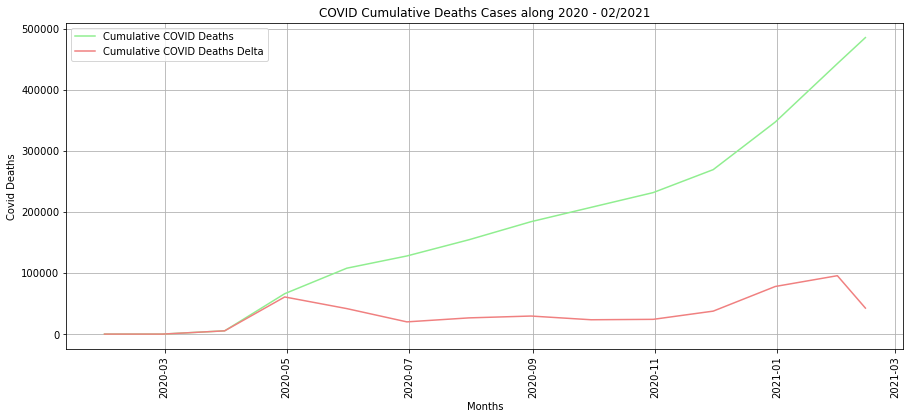

In [31]:
x_axis = usa1['Date']
d_axis = usa1['Deaths']
dd_axis = usa1['Deaths Delta']
plt.figure(figsize=(15,6))
plt.plot(x_axis, d_axis, color = 'lightgreen', label = 'Cumulative COVID Deaths')
plt.plot(x_axis, dd_axis, color = 'lightcoral', label = 'Cumulative COVID Deaths Delta')
plt.xlabel('Months')
plt.ylabel('Covid Deaths')
plt.xticks(rotation='vertical')
plt.title('COVID Cumulative Deaths Cases along 2020 - 02/2021')
plt.grid()
plt.legend()
plt.show

In [50]:
# plotly.offline.init_notebook_mode(connected=True)

# plotly.offline.iplot({
#     'data': [go.Scatter(x = x_axis, y = usa1['Deaths'])],
#     'layout' : go.Layout(title = 'COVID Cumulative Deaths Cases along 2020 - 02/2021')
# })

# plotly.offline.iplot({
#     'data' : [go.Scatter(x = x_axis, y = usa1['Deaths Delta'])],
#     'layout' : go.Layout(title = 'COVID Delta Deaths Cases along 2020 - 02/2021' )
# })

In [51]:
# plotly.offline.iplot({
#     'data': [go.Scatter(x = x_axis, y = usa1['Confirmed'])],
#     'layout' : go.Layout(title = 'COVID Cumulative Confirmed Cases along 2020 - 02/2021')
# })

# plotly.offline.iplot({
#     'data' : [go.Scatter(x = x_axis, y = usa1['Confirmed Delta'])],
#     'layout' : go.Layout(title = 'COVID Delta Confirmed Cases along 2020 - 02/2021')
# })

In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = x_axis,
                        y = usa1['Confirmed'],
                        mode = 'lines+markers',
                        name = 'Cumulative Confirmed COVID Cases',
                        marker_color = 'turquoise'
                        ))
fig.add_trace(go.Scatter(x = x_axis,
                        y = usa1['Confirmed Delta'],
                        mode = 'lines + markers',
                        name = 'Delta Confirmed COVID Cases',
                        marker_color = 'violet'
                        ))

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x = x_axis,
                       y = usa1['Deaths'],
                       mode = 'lines+markers',
                       name = 'Cumulative COVID Deaths',
                       marker_color = 'goldenrod'
                       ))
fig.add_trace(go.Scatter(x = x_axis,
                        y = usa1['Deaths Delta'],
                        mode = 'lines+markers',
                        name = 'COVID Delta Deaths',
                        marker_color = 'lightslategrey'
                        ))

fig.show()

In [55]:
%%bash
pip install plotly